In [ ]:
pip install ultralytics

In [ ]:
pip uninstall numpy -y

In [ ]:
pip install "numpy<2"

# Random Sample Images of Dataset

In [27]:
%matplotlib inline
import os
import random
import yaml
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from IPython.display import display

In [37]:
def show_yolo_images(train_path, yaml_path, num_images=4):
    """
    Display random images from YOLOv8 dataset with their bounding boxes and class names
    
    Args:
        train_path: Path to your train folder (contains 'images' and 'labels' subfolders)
        yaml_path: Path to your data.yaml file
        num_images: Number of random images to display
    """
    # Paths to images and labels
    images_path = os.path.join(train_path, 'images')
    labels_path = os.path.join(train_path, 'labels')
    
    # Load class names from yaml
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)
        class_names = data['names']
        
        # Handle both list and dict formats
        if isinstance(class_names, dict):
            class_names = class_names
        else:
            class_names = {i: name for i, name in enumerate(class_names)}
    
    # Get all image files
    image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    # Select random images
    selected_images = random.sample(image_files, min(num_images, len(image_files)))
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    axes = axes.flatten()
    
    # Colors for different classes
    colors = plt.cm.tab20(range(20))
    
    for idx, img_file in enumerate(selected_images):
        # Load image
        img_path = os.path.join(images_path, img_file)
        img = Image.open(img_path)
        width, height = img.size
        
        # Load corresponding label
        label_file = os.path.splitext(img_file)[0] + '.txt'
        label_path = os.path.join(labels_path, label_file)
        
        # Display image
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f'{img_file}', fontsize=10)
        
        # Read and draw bounding boxes
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    # YOLO format: class_id center_x center_y width height (normalized)
                    parts = line.strip().split()
                    class_id = int(parts[0])
                    x_center, y_center, w, h = map(float, parts[1:5])
                    
                    # Convert from normalized to pixel coordinates
                    x_center *= width
                    y_center *= height
                    w *= width
                    h *= height
                    
                    # Convert center format to corner format
                    x1 = x_center - w/2
                    y1 = y_center - h/2
                    
                    # Draw rectangle
                    rect = patches.Rectangle(
                        (x1, y1), w, h,
                        linewidth=2,
                        edgecolor=colors[class_id % len(colors)],
                        facecolor='none'
                    )
                    axes[idx].add_patch(rect)
                    
                    # Add class label with name
                    class_name = class_names.get(class_id, f'Class {class_id}')
                    axes[idx].text(
                        x1, y1-5,
                        class_name,
                        color='white',
                        fontsize=9,
                        weight='bold',
                        bbox=dict(facecolor=colors[class_id % len(colors)], alpha=0.8, pad=2)
                    )
        else:
            axes[idx].text(
                0.5, 0.5, 'No labels found',
                transform=axes[idx].transAxes,
                ha='center', va='center',
                fontsize=12, color='red'
            )
    
    plt.tight_layout()
    plt.show()  

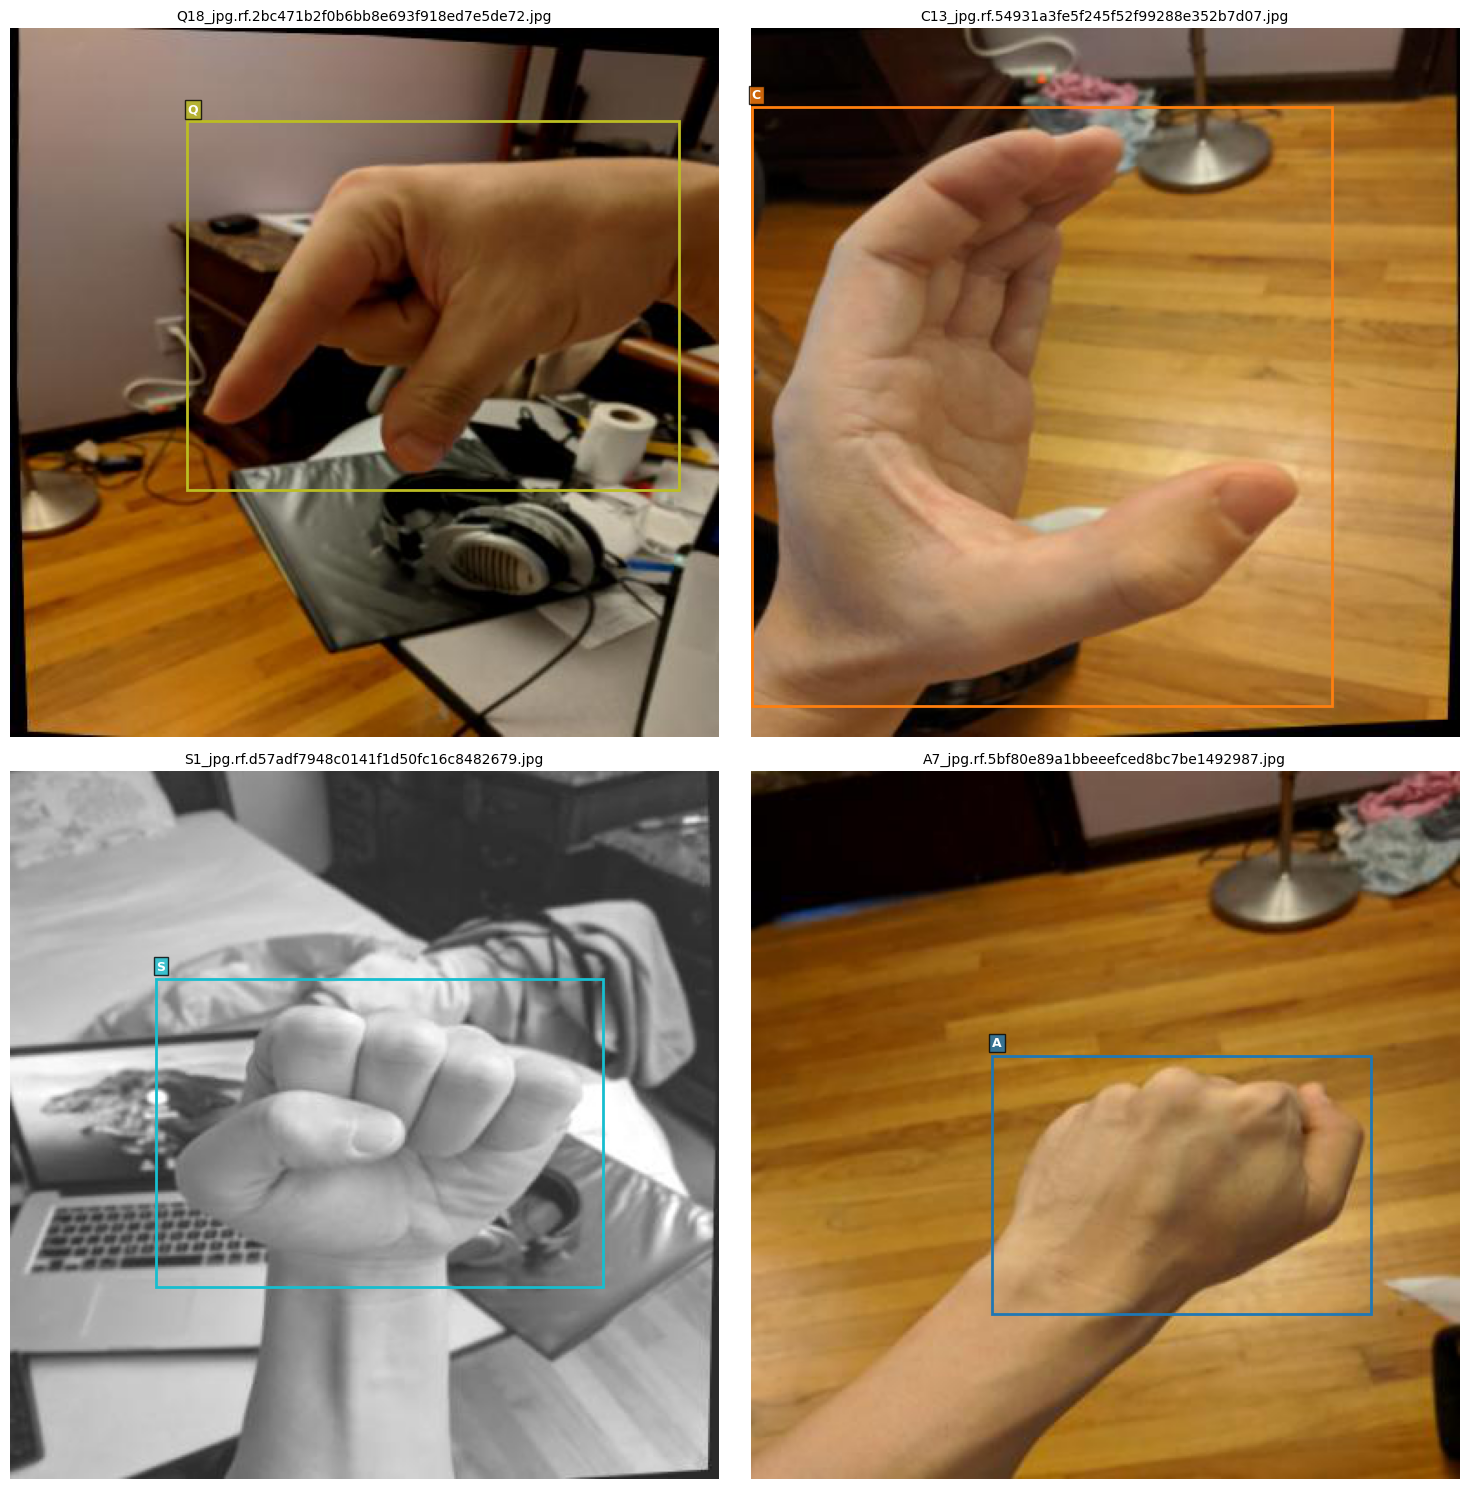

In [41]:
train_path = 'data/train'
yaml_path = 'data/data.yaml'  

show_yolo_images(train_path, yaml_path, num_images=4)

# Modeling

## YOLOv8

### YOLOv8-n (Nano)

YOLOv8-n is an ultra-lightweight version of YOLOv8, designed for speed and efficiency. It has very few parameters, allowing for fast training and inference. As a baseline model, it provides a reference point for evaluating the performance gains of larger YOLOv8 variants on the same dataset. While fast, its accuracy is lower than larger models.

In [5]:
from ultralytics import YOLO

# Load the smallest YOLOv8 model (baseline)
model = YOLO("yolov8n.pt")

# Train
model.train(
    data="data/data.yaml",  
    epochs=10,
    imgsz=640,
    batch=16,
    name="yolo8n_baseline"  
)

New https://pypi.org/project/ultralytics/8.3.233 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.232  Python-3.12.4 torch-2.2.2+cpu CPU (AMD Ryzen 5 PRO 4650G with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo8n_baseline, nbs=64, nms=False,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002BF007CA4E0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0

### YOLOv8-s (Small)

YOLOv8-s is a larger, more capable version of YOLOv8 that balances speed and detection performance. With more layers and parameters than the nano model, it captures richer features and achieves higher accuracy on the same dataset. YOLOv8-s serves as the main model to benchmark against the YOLOv8-n baseline, showing the benefits of increased model capacity.

In [8]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")  

model.train(
    data="data/data.yaml",
    epochs=10,
    imgsz=640,
    batch=16,
    name="yolo_model"
)

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Usher\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.232  Python-3.12.4 torch-2.2.2+cpu CPU (AMD Ryzen 5 PRO 4650G with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001782022BCE0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0

# Results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# ---------- PLOTTER FUNCTION ----------
def plot_results(df, model_title):
    rows = 5
    cols = 2
    fig, axes = plt.subplots(rows, cols, figsize=(14, 18))
    fig.suptitle(f"{model_title} Training Metrics", fontsize=18, fontweight='bold')

    for i, (metric_key, metric_title) in enumerate(metrics):
        r = i // cols
        c = i % cols
        ax = axes[r][c]

        ax.plot(df["epoch"], df[metric_key], linewidth=2)
        ax.set_title(metric_title, fontsize=12)
        ax.set_xlabel("Epoch")
        ax.set_ylabel(metric_title)
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [20]:
# Metrics to plot
metrics = [
    ("train/box_loss", "Train Box Loss"),
    ("train/cls_loss", "Train Class Loss"),
    ("train/dfl_loss", "Train DFL Loss"),
    ("val/box_loss", "Validation Box Loss"),
    ("val/cls_loss", "Validation Class Loss"),
    ("val/dfl_loss", "Validation DFL Loss"),
    ("metrics/precision(B)", "Precision"),
    ("metrics/recall(B)", "Recall"),
    ("metrics/mAP50(B)", "mAP@50"),
    ("metrics/mAP50-95(B)", "mAP@50-95")
]

## YOLOv8-n (Nano) 

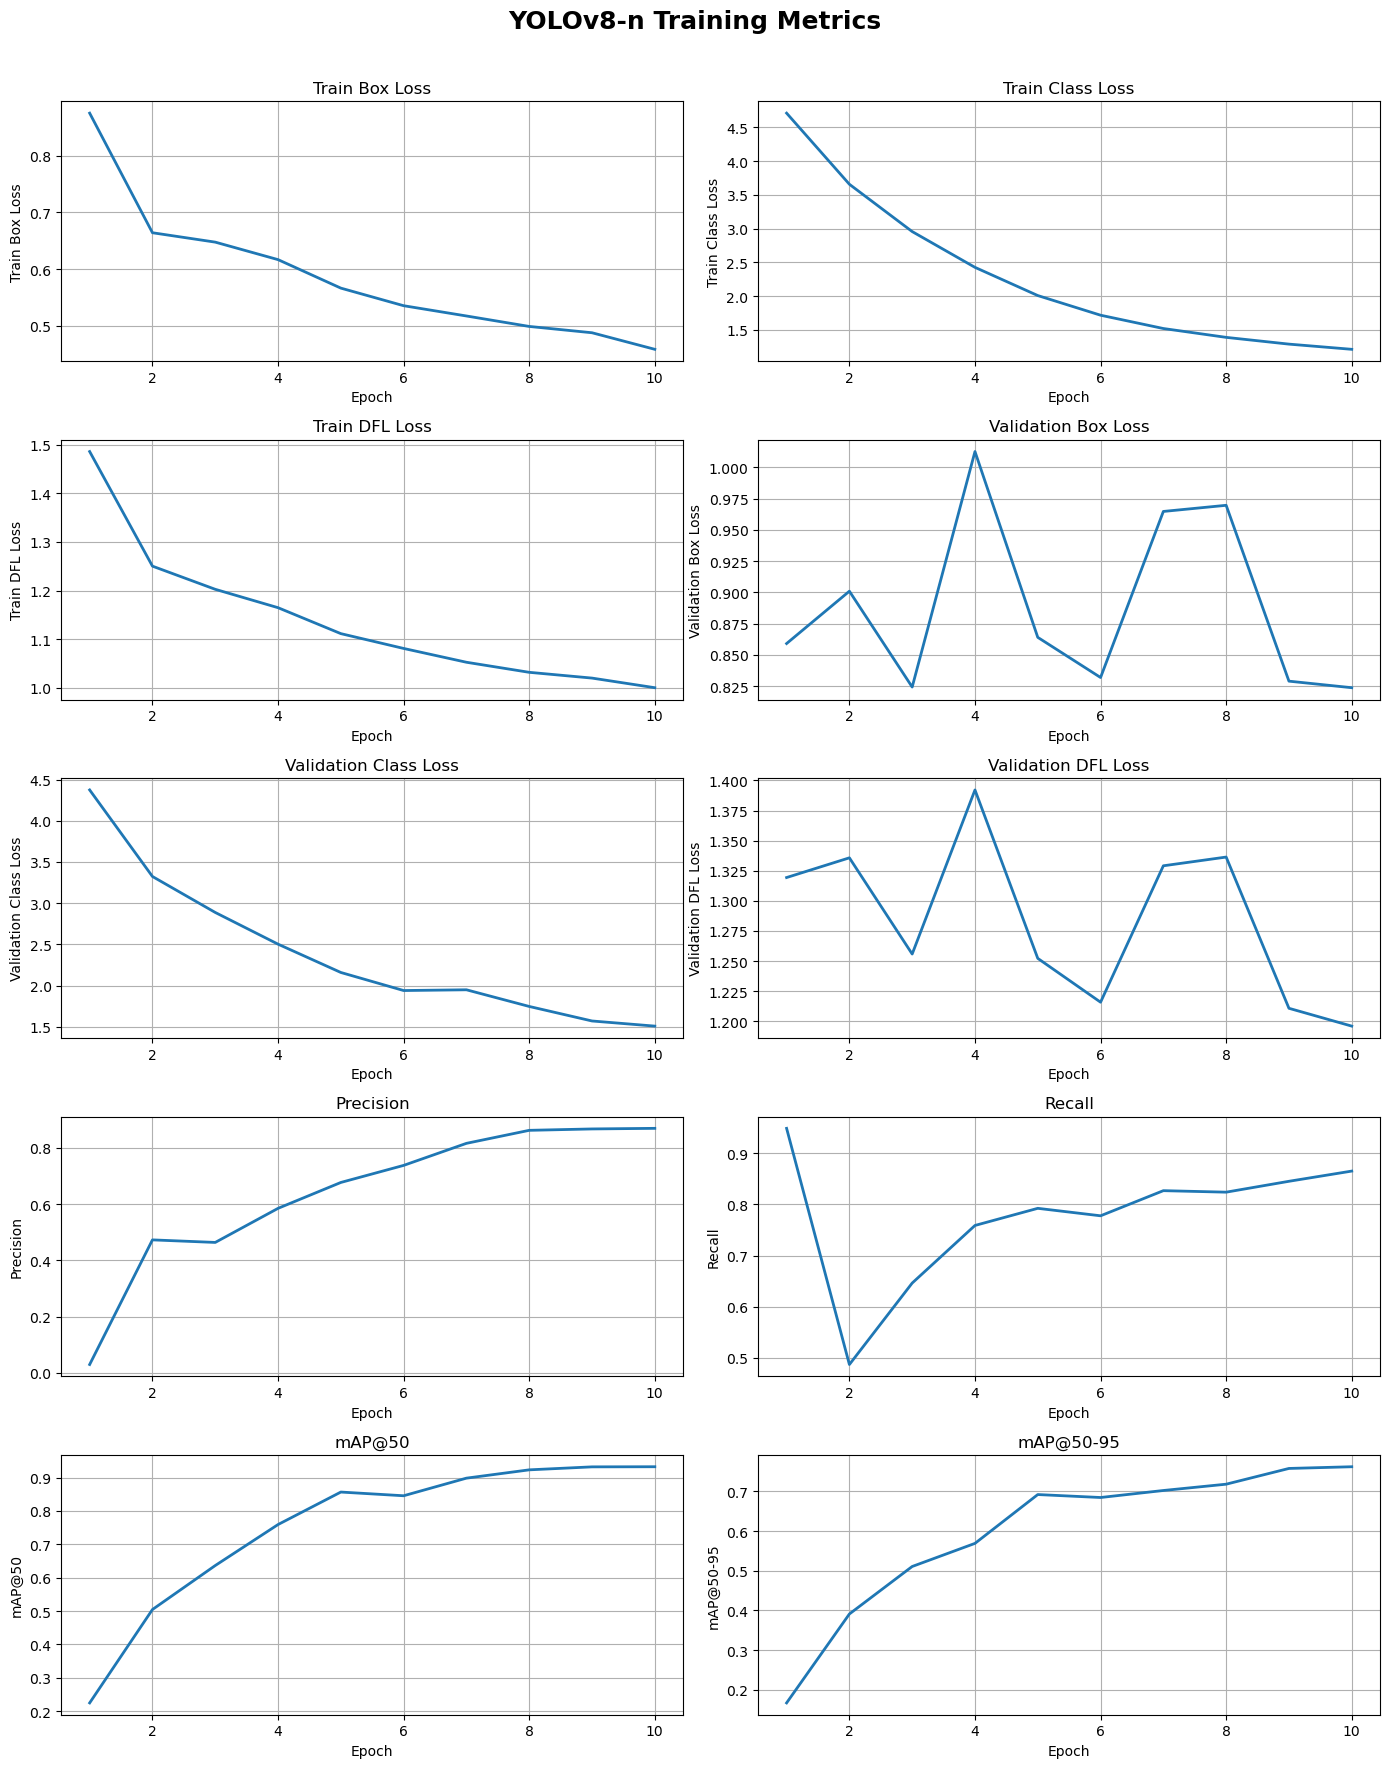

In [23]:
df_baseline = pd.read_csv("runs/detect/yolo8n_baseline/results.csv")
plot_results(df_baseline, "YOLOv8-n")

In [19]:
df = pd.read_csv("runs/detect/yolo8n_baseline/results.csv")
best = df.loc[df["metrics/mAP50-95(B)"].idxmax()]

print("Best Epoch:", best["epoch"])
print("Best mAP50-95:", best["metrics/mAP50-95(B)"])
print("Best Precision:", best["metrics/precision(B)"])
print("Best Recall:", best["metrics/recall(B)"])

Best Epoch: 10.0
Best mAP50-95: 0.76236
Best Precision: 0.86954
Best Recall: 0.86505


## YOLOv8-s (Small) 

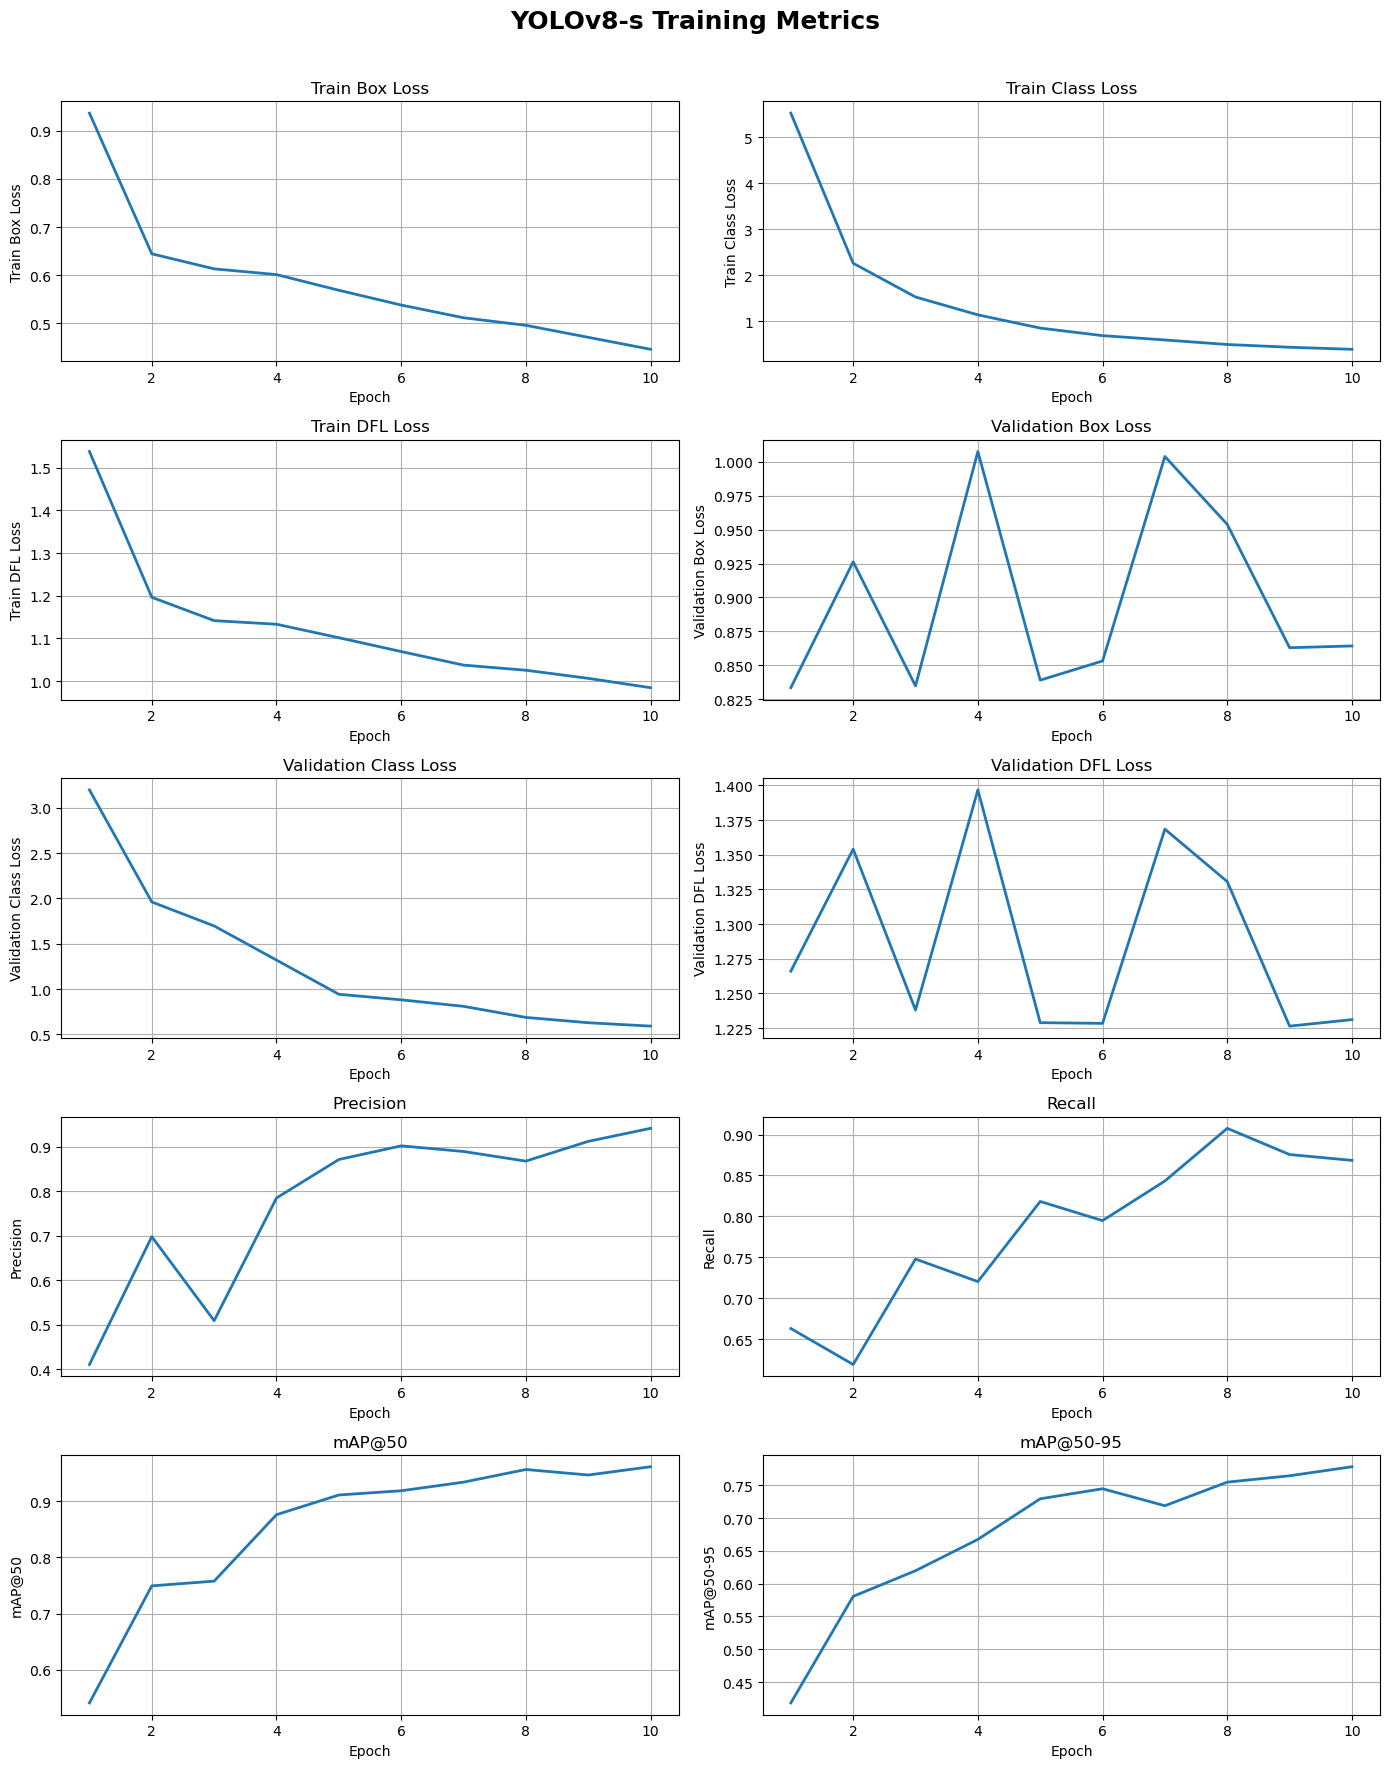

In [24]:
df_model = pd.read_csv("runs/detect/yolo_model/results.csv")
plot_results(df_model, "YOLOv8-s")

In [18]:
df = pd.read_csv("runs/detect/yolo_model/results.csv")
best = df.loc[df["metrics/mAP50-95(B)"].idxmax()]

print("Best Epoch:", best["epoch"])
print("Best mAP50-95:", best["metrics/mAP50-95(B)"])
print("Best Precision:", best["metrics/precision(B)"])
print("Best Recall:", best["metrics/recall(B)"])

Best Epoch: 10.0
Best mAP50-95: 0.77813
Best Precision: 0.94178
Best Recall: 0.86841


## YOLOv8 Model Performance Comparison

| Model        | Best Epoch | mAP50-95 | Precision |  Recall |
| ------------ | ---------: | -------: | --------: | ------: |
| **YOLOv8-n** |         10 |  0.76236 |   0.86954 | 0.86505 |
| **YOLOv8-s** |         10 |  0.77813 |   0.94178 | 0.86841 |

# Video Testing

In [1]:
from ultralytics import YOLO
import cv2
import numpy as np
import os
import torch
import torch.nn.functional as F
from collections import Counter

## Functions

In [7]:
def get_video_rotation(video_path):
    """Extract rotation metadata from video file."""
    cap = cv2.VideoCapture(video_path)
    rotation = cap.get(cv2.CAP_PROP_ORIENTATION_META)
    cap.release()
    return rotation

def rotate_frame(frame, rotation):
    """Rotate frame based on rotation angle."""
    if rotation == 90:
        return cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
    elif rotation == 180:
        return cv2.rotate(frame, cv2.ROTATE_180)
    elif rotation == 270:
        return cv2.rotate(frame, cv2.ROTATE_90_COUNTERCLOCKWISE)
    else:
        return frame

def get_dominant_letter(detections, conf_threshold=0.5):
    """Get the most confident letter detection from a frame."""
    if len(detections) == 0:
        return None
    
    # Get the first result (frame detections)
    result = detections[0]
    
    # Check if there are any boxes detected
    if len(result.boxes) == 0:
        return None
    
    # Filter by confidence threshold
    valid_detections = []
    for i in range(len(result.boxes)):
        confidence = float(result.boxes.conf[i])
        if confidence >= conf_threshold:
            class_id = int(result.boxes.cls[i])
            class_name = result.names[class_id]
            valid_detections.append((class_name, confidence))
    
    if not valid_detections:
        return None
    
    # Return the detection with highest confidence
    return max(valid_detections, key=lambda x: x[1])[0]

def levenshtein_distance(s1, s2):
    """Calculate Levenshtein (edit) distance between two strings."""
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)
    
    if len(s2) == 0:
        return len(s1)
    
    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            # Cost of insertions, deletions, or substitutions
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

def calculate_accuracy_metrics(predicted, ground_truth):
    """Calculate various accuracy metrics for sequence prediction."""
    # Exact match
    exact_match = predicted == ground_truth
    
    # Levenshtein distance
    edit_distance = levenshtein_distance(predicted, ground_truth)
    
    # Character-level accuracy (considering alignment)
    max_len = max(len(predicted), len(ground_truth))
    if max_len == 0:
        char_accuracy = 0.0
    else:
        char_accuracy = 1 - (edit_distance / max_len)
    
    # Word Error Rate (WER) - normalized edit distance
    wer = edit_distance / len(ground_truth) if len(ground_truth) > 0 else float('inf')
    
    # Character Error Rate (CER)
    cer = edit_distance / len(ground_truth) if len(ground_truth) > 0 else float('inf')
    
    # Subsequence matching (how many ground truth chars appear in order)
    subsequence_matches = 0
    pred_idx = 0
    for gt_char in ground_truth:
        while pred_idx < len(predicted):
            if predicted[pred_idx] == gt_char:
                subsequence_matches += 1
                pred_idx += 1
                break
            pred_idx += 1
    
    subsequence_accuracy = subsequence_matches / len(ground_truth) if len(ground_truth) > 0 else 0.0
    
    return {
        'exact_match': exact_match,
        'edit_distance': edit_distance,
        'character_accuracy': char_accuracy * 100,  # as percentage
        'wer': wer * 100,  # as percentage
        'cer': cer * 100,  # as percentage
        'subsequence_accuracy': subsequence_accuracy * 100  # as percentage
    }

def evaluate_prediction(predicted, ground_truth, model_name):
    """Evaluate and print prediction metrics."""
    metrics = calculate_accuracy_metrics(predicted, ground_truth)
    
    print(f"\n{'='*60}")
    print(f"{model_name} EVALUATION")
    print(f"{'='*60}")
    print(f"Ground Truth:  '{ground_truth}'")
    print(f"Predicted:     '{predicted}'")
    print(f"\nMetrics:")
    print(f"  Exact Match:           {'✓ YES' if metrics['exact_match'] else '✗ NO'}")
    print(f"  Edit Distance:         {metrics['edit_distance']} operations")
    print(f"  Character Accuracy:    {metrics['character_accuracy']:.1f}%")
    print(f"  Character Error Rate:  {metrics['cer']:.1f}%")
    print(f"  Word Error Rate:       {metrics['wer']:.1f}%")
    print(f"  Subsequence Accuracy:  {metrics['subsequence_accuracy']:.1f}%")
    print(f"{'='*60}")
    
    return metrics
    """
    Reconstruct letter sequence from frame-by-frame detections.
    Only adds a letter if it appears for at least stability_threshold consecutive frames.
    """
    if not letter_history:
        return ""
    
    sequence = []
    current_letter = letter_history[0]
    count = 1
    
    for i in range(1, len(letter_history)):
        if letter_history[i] == current_letter:
            count += 1
        else:
            # Letter changed - check if previous letter was stable enough
            if current_letter is not None and count >= stability_threshold:
                sequence.append(current_letter)
            current_letter = letter_history[i]
            count = 1
    
    # Add the last letter if stable
    if current_letter is not None and count >= stability_threshold:
        sequence.append(current_letter)
    
    return ''.join(sequence)

def reconstruct_sequence(letter_history, stability_threshold=5):
    """
    Reconstruct letter sequence from frame-by-frame detections.
    Only adds a letter if it appears for at least stability_threshold consecutive frames.
    """
    if not letter_history:
        return ""
    
    sequence = []
    current_letter = letter_history[0]
    count = 1
    
    for i in range(1, len(letter_history)):
        if letter_history[i] == current_letter:
            count += 1
        else:
            # Letter changed - check if previous letter was stable enough
            if current_letter is not None and count >= stability_threshold:
                sequence.append(current_letter)
            current_letter = letter_history[i]
            count = 1
    
    # Add the last letter if stable
    if current_letter is not None and count >= stability_threshold:
        sequence.append(current_letter)
    
    return ''.join(sequence)

def test_model_with_sequence(model, model_name, video_path, output_dir, vid_name, 
                              conf_threshold=0.5, stability_threshold=5):
    """Run inference and reconstruct letter sequence."""
    cap = cv2.VideoCapture(video_path)
    
    # Get rotation metadata
    rotation = get_video_rotation(video_path)
    print(f"Video rotation metadata: {rotation} degrees")
    
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)
    
    # Adjust dimensions if rotation is 90 or 270 degrees
    if rotation in [90, 270]:
        width, height = height, width
    
    out_path = os.path.join(output_dir, f"{vid_name}_{model_name}.mp4")
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(out_path, fourcc, fps, (width, height))
    
    letter_history = []
    frame_count = 0
    detection_stats = Counter()
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Apply rotation correction
        frame = rotate_frame(frame, rotation)
        
        # Run inference
        results = model(frame, conf=conf_threshold)
        
        # Get dominant letter in this frame
        dominant_letter = get_dominant_letter(results, conf_threshold)
        letter_history.append(dominant_letter)
        
        if dominant_letter:
            detection_stats[dominant_letter] += 1
        
        # Get annotated frame
        annotated_frame = results[0].plot()
        
        # Add current detected letter to frame
        if dominant_letter:
            cv2.putText(annotated_frame, f"Letter: {dominant_letter}", 
                       (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        # Ensure uint8
        if annotated_frame.dtype != np.uint8:
            annotated_frame = (annotated_frame * 255).astype(np.uint8)
        
        out.write(annotated_frame)
        frame_count += 1
        
        if frame_count % 30 == 0:
            print(f"Processed {frame_count} frames...")
    
    cap.release()
    out.release()
    
    # Reconstruct sequence
    reconstructed_sequence = reconstruct_sequence(letter_history, stability_threshold)
    
    # Print results
    print(f"\n{'='*60}")
    print(f"Model: {model_name}")
    print(f"{'='*60}")
    print(f"Output video: {out_path}")
    print(f"Total frames: {frame_count}")
    print(f"Frames with detections: {sum(1 for x in letter_history if x is not None)}")
    print(f"\nDetection frequency:")
    for letter, count in detection_stats.most_common():
        print(f"  {letter}: {count} frames ({count/frame_count*100:.1f}%)")
    print(f"\nReconstructed sequence: {reconstructed_sequence}")
    print(f"Sequence length: {len(reconstructed_sequence)} letters")
    print(f"{'='*60}\n")
    
    return reconstructed_sequence, detection_stats

def create_side_by_side_comparison(model_n, model_s, video_path, output_dir, vid_name,
                                   conf_threshold=0.5, stability_threshold=5):
    """Create side-by-side comparison video of both models."""
    import re
    
    # Extract ground truth from video name
    ground_truth_match = re.match(r'([A-Za-z]+)', vid_name)
    if ground_truth_match:
        ground_truth = ground_truth_match.group(1).upper()
    else:
        ground_truth = vid_name.upper()
    
    cap = cv2.VideoCapture(video_path)
    
    # Get rotation metadata
    rotation = get_video_rotation(video_path)
    print(f"Video rotation metadata: {rotation} degrees")
    
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)
    
    # Adjust dimensions if rotation is 90 or 270 degrees
    if rotation in [90, 270]:
        width, height = height, width
    
    # Side-by-side video will be double width
    comparison_width = width * 2
    
    out_path = os.path.join(output_dir, f"{vid_name}_comparison.mp4")
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(out_path, fourcc, fps, (comparison_width, height))
    
    letter_history_n = []
    letter_history_s = []
    detection_stats_n = Counter()
    detection_stats_s = Counter()
    frame_count = 0
    
    print("Processing frames for side-by-side comparison...")
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Apply rotation correction
        frame = rotate_frame(frame, rotation)
        
        # Run inference on both models
        results_n = model_n(frame, conf=conf_threshold)
        results_s = model_s(frame, conf=conf_threshold)
        
        # Get dominant letters
        dominant_letter_n = get_dominant_letter(results_n, conf_threshold)
        dominant_letter_s = get_dominant_letter(results_s, conf_threshold)
        
        letter_history_n.append(dominant_letter_n)
        letter_history_s.append(dominant_letter_s)
        
        if dominant_letter_n:
            detection_stats_n[dominant_letter_n] += 1
        if dominant_letter_s:
            detection_stats_s[dominant_letter_s] += 1
        
        # Get annotated frames
        annotated_n = results_n[0].plot()
        annotated_s = results_s[0].plot()
        
        # Ensure uint8
        if annotated_n.dtype != np.uint8:
            annotated_n = (annotated_n * 255).astype(np.uint8)
        if annotated_s.dtype != np.uint8:
            annotated_s = (annotated_s * 255).astype(np.uint8)
        
        # Add model labels with BLACK color and bold text (thicker stroke)
        cv2.putText(
            annotated_n, "YOLOv8n", (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
        cv2.putText(
            annotated_s, "YOLOv8s", (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
        if dominant_letter_n:
            cv2.putText(
                annotated_n, f"Letter: {dominant_letter_n}",
                (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
        if dominant_letter_s:
            cv2.putText(
                annotated_s, f"Letter: {dominant_letter_s}",
                (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)

        # Concatenate frames side by side
        combined_frame = np.hstack([annotated_n, annotated_s])
        
        out.write(combined_frame)
        frame_count += 1
        
        if frame_count % 30 == 0:
            print(f"Processed {frame_count} frames...")
    
    cap.release()
    out.release()
    
    # Reconstruct sequences
    seq_n = reconstruct_sequence(letter_history_n, stability_threshold)
    seq_s = reconstruct_sequence(letter_history_s, stability_threshold)
    
    # Calculate evaluation metrics
    metrics_n = calculate_accuracy_metrics(seq_n, ground_truth)
    metrics_s = calculate_accuracy_metrics(seq_s, ground_truth)
    
    # Print results
    print(f"\n{'='*60}")
    print(f"SIDE-BY-SIDE COMPARISON RESULTS")
    print(f"{'='*60}")
    print(f"Ground Truth (from video name): '{ground_truth}'")
    print(f"Output video: {out_path}")
    print(f"Total frames: {frame_count}")
    print(f"\nYOLOv8n:")
    print(f"  Frames with detections: {sum(1 for x in letter_history_n if x is not None)}")
    print(f"  Reconstructed sequence: '{seq_n}'")
    print(f"  Sequence length: {len(seq_n)} letters")
    print(f"  Character Accuracy: {metrics_n['character_accuracy']:.1f}%")
    print(f"  Edit Distance: {metrics_n['edit_distance']} operations")
    
    print(f"\nYOLOv8s:")
    print(f"  Frames with detections: {sum(1 for x in letter_history_s if x is not None)}")
    print(f"  Reconstructed sequence: '{seq_s}'")
    print(f"  Sequence length: {len(seq_s)} letters")
    print(f"  Character Accuracy: {metrics_s['character_accuracy']:.1f}%")
    print(f"  Edit Distance: {metrics_s['edit_distance']} operations")
    
    print(f"\nSequences match: {seq_n == seq_s}")
    
    if metrics_s['character_accuracy'] > metrics_n['character_accuracy']:
        improvement = metrics_s['character_accuracy'] - metrics_n['character_accuracy']
        print(f"✓ YOLOv8s outperforms YOLOv8n by {improvement:.1f} percentage points")
    elif metrics_n['character_accuracy'] > metrics_s['character_accuracy']:
        difference = metrics_n['character_accuracy'] - metrics_s['character_accuracy']
        print(f"✓ YOLOv8n outperforms YOLOv8s by {difference:.1f} percentage points")
    else:
        print(f"= Both models have equal character accuracy")
    
    print(f"\nYOLOv8n detection frequency:")
    for letter, count in detection_stats_n.most_common(5):
        print(f"  {letter}: {count} frames ({count/frame_count*100:.1f}%)")
    
    print(f"\nYOLOv8s detection frequency:")
    for letter, count in detection_stats_s.most_common(5):
        print(f"  {letter}: {count} frames ({count/frame_count*100:.1f}%)")
    
    print(f"{'='*60}\n")
    
    return seq_n, seq_s, detection_stats_n, detection_stats_s, metrics_n, metrics_s, ground_truth

In [3]:
class YOLOGradCAM:
    """Activation-based visualization for YOLOv8"""
    
    def __init__(self, model, target_layer_idx=-3):
        """
        Args:
            model: YOLO model
            target_layer_idx: Index of layer to visualize (default: -3, a deeper layer)
        """
        self.model = model.model
        self.device = next(self.model.parameters()).device
        self.activations = None
        
        # Get a meaningful layer (one of the detection layers)
        # YOLOv8 typically has detection layers at indices like 15, 18, 21
        self.target_layer = None
        conv_layers = []
        
        for module in self.model.modules():
            if isinstance(module, torch.nn.Conv2d):
                conv_layers.append(module)
        
        # Use a layer towards the end but not the very last
        if len(conv_layers) > 0:
            layer_idx = max(0, len(conv_layers) + target_layer_idx)
            self.target_layer = conv_layers[layer_idx]
            print(f"Using layer at index {layer_idx} out of {len(conv_layers)} conv layers")
        
        # Register hook
        if self.target_layer is not None:
            self.target_layer.register_forward_hook(self.save_activation)
    
    def save_activation(self, module, input, output):
        """Hook to save activations"""
        self.activations = output.detach()
    
    def preprocess_frame(self, frame):
        """Preprocess frame for YOLO input"""
        # Convert BGR to RGB
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Resize to model input size (640x640 for YOLO)
        img_resized = cv2.resize(img, (640, 640))
        
        # Convert to tensor and normalize
        img_tensor = torch.from_numpy(img_resized).permute(2, 0, 1).float() / 255.0
        img_tensor = img_tensor.unsqueeze(0).to(self.device)
        
        return img_tensor
    
    def generate_heatmap(self, frame):
        """Generate activation heatmap from raw frame"""
        self.model.eval()
        
        # Preprocess frame
        input_tensor = self.preprocess_frame(frame)
        
        # Forward pass
        with torch.no_grad():
            try:
                _ = self.model(input_tensor)
            except Exception as e:
                print(f"Forward pass failed: {e}")
                return None
        
        # Check if we have activations
        if self.activations is None:
            print("No activations captured")
            return None
        
        # Get activations from first batch
        activations = self.activations[0]  # Shape: [C, H, W]
        
        # Average across channels to get spatial attention map
        heatmap = torch.mean(activations, dim=0)
        
        # Apply ReLU and move to CPU
        heatmap = F.relu(heatmap).cpu().numpy()
        
        # Normalize to 0-1
        if heatmap.max() > heatmap.min():
            heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
        
        return heatmap

def apply_heatmap(image, heatmap, alpha=0.4):
    """Apply heatmap overlay to image"""
    # Resize heatmap to match image size
    heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    
    # Convert heatmap to color
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    
    # Overlay
    output = cv2.addWeighted(image, 1 - alpha, heatmap_colored, alpha, 0)
    
    return output

def simple_attention_visualization(frame, results, alpha=0.4):
    """
    Simpler approach: Visualize detection confidence as attention.
    This doesn't require gradients but shows where the model is confident.
    """
    # Create blank heatmap
    heatmap = np.zeros((frame.shape[0], frame.shape[1]), dtype=np.float32)
    
    # Get detections
    if len(results[0].boxes) > 0:
        boxes = results[0].boxes.xyxy.cpu().numpy()
        confs = results[0].boxes.conf.cpu().numpy()
        
        # Draw Gaussian-like attention around each detection
        for box, conf in zip(boxes, confs):
            x1, y1, x2, y2 = map(int, box)
            center_x = (x1 + x2) // 2
            center_y = (y1 + y2) // 2
            width = x2 - x1
            height = y2 - y1
            
            # Create Gaussian-like mask
            Y, X = np.ogrid[:frame.shape[0], :frame.shape[1]]
            dist = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
            mask = np.exp(-dist / (max(width, height) / 2))
            
            # Add weighted by confidence
            heatmap += mask * conf
    
    # Normalize
    if heatmap.max() > 0:
        heatmap = heatmap / heatmap.max()
    
    # Apply colormap
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    
    # Overlay
    output = cv2.addWeighted(frame, 1 - alpha, heatmap_colored, alpha, 0)
    
    return output

def create_gradcam_video(model, video_path, output_dir, vid_name, use_simple=True):
    """Create video with Grad-CAM or attention visualization"""
    cap = cv2.VideoCapture(video_path)
    
    rotation = get_video_rotation(video_path)
    print(f"Video rotation metadata: {rotation} degrees")
    
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)
    
    if rotation in [90, 270]:
        width, height = height, width
    
    out_path = os.path.join(output_dir, f"{vid_name}_gradcam.mp4")
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(out_path, fourcc, fps, (width * 2, height))
    
    frame_count = 0
    
    print(f"Creating {'attention' if use_simple else 'Grad-CAM'} visualization...")
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        frame = rotate_frame(frame, rotation)
        
        # Run inference
        results = model(frame, verbose=False)
        
        # Get annotated frame
        annotated = results[0].plot()
        
        # Create attention/heatmap visualization
        if use_simple:
            heatmap_vis = simple_attention_visualization(frame, results, alpha=0.5)
        else:
            # Activation-based visualization (no gradients needed)
            gradcam = YOLOGradCAM(model)
            heatmap = gradcam.generate_heatmap(frame)
            if heatmap is not None:
                heatmap_vis = apply_heatmap(frame, heatmap, alpha=0.5)
            else:
                heatmap_vis = frame.copy()
                cv2.putText(heatmap_vis, "Heatmap unavailable", (10, 60), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        # Add labels
        cv2.putText(annotated, "Detection", (10, 30), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        cv2.putText(heatmap_vis, "Attention Map", (10, 30), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        
        # Ensure uint8
        if annotated.dtype != np.uint8:
            annotated = (annotated * 255).astype(np.uint8)
        if heatmap_vis.dtype != np.uint8:
            heatmap_vis = np.clip(heatmap_vis, 0, 255).astype(np.uint8)
        
        # Combine side by side
        combined = np.hstack([annotated, heatmap_vis])
        
        out.write(combined)
        frame_count += 1
        
        if frame_count % 30 == 0:
            print(f"Processed {frame_count} frames...")
    
    cap.release()
    out.release()
    
    print(f"\nGrad-CAM visualization saved to: {out_path}")
    print(f"Total frames: {frame_count}")

## Testing

In [4]:
output_dir = "video_results"
os.makedirs(output_dir, exist_ok=True)

# YOLOv8 weights
weights_s = r"runs/detect/yolo_model/weights/best.pt"
weights_n = r"runs/detect/yolo8n_baseline/weights/best.pt"

# Load models
model_s = YOLO(weights_s)
model_n = YOLO(weights_n)

### Dog

In [18]:
# --- Paths ---
video_path = "videos/Dog.mp4"
vid_name = "Dog"

In [68]:
# Create side-by-side comparison
print("Creating side-by-side comparison video...")
seq_n, seq_s, stats_n, stats_s, metrics_n, metrics_s, ground_truth = create_side_by_side_comparison(
    model_n, model_s, video_path, output_dir, vid_name,
    conf_threshold=0.5, stability_threshold=5
)

Creating side-by-side comparison video...
Video rotation metadata: 0.0 degrees
Processing frames for side-by-side comparison...

0: 384x640 (no detections), 115.0ms
Speed: 11.6ms preprocess, 115.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 216.5ms
Speed: 3.2ms preprocess, 216.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 114.1ms
Speed: 4.0ms preprocess, 114.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 D, 283.8ms
Speed: 3.9ms preprocess, 283.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 114.9ms
Speed: 3.6ms preprocess, 114.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 D, 241.9ms
Speed: 4.2ms preprocess, 241.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 120.2ms
Speed: 3.5ms preprocess, 120.2ms inference, 0.8m

In [63]:
# Detailed evaluation report
print("\n" + "="*60)
print("DETAILED EVALUATION REPORT")
print("="*60)

evaluate_prediction(seq_n, ground_truth, "YOLOv8n")
evaluate_prediction(seq_s, ground_truth, "YOLOv8s")


DETAILED EVALUATION REPORT

YOLOv8n EVALUATION
Ground Truth:  'DOG'
Predicted:     'DOGG'

Metrics:
  Exact Match:           ✗ NO
  Edit Distance:         1 operations
  Character Accuracy:    75.0%
  Character Error Rate:  33.3%
  Word Error Rate:       33.3%
  Subsequence Accuracy:  100.0%

YOLOv8s EVALUATION
Ground Truth:  'DOG'
Predicted:     'DOG'

Metrics:
  Exact Match:           ✓ YES
  Edit Distance:         0 operations
  Character Accuracy:    100.0%
  Character Error Rate:  0.0%
  Word Error Rate:       0.0%
  Subsequence Accuracy:  100.0%


{'exact_match': True,
 'edit_distance': 0,
 'character_accuracy': 100.0,
 'wer': 0.0,
 'cer': 0.0,
 'subsequence_accuracy': 100.0}

In [64]:
# Final comparison summary
print(f"\n{'='*60}")
print("FINAL MODEL COMPARISON")
print(f"{'='*60}")
print(f"Ground Truth: '{ground_truth}'")
print(f"\nYOLOv8n: '{seq_n}' - Character Accuracy: {metrics_n['character_accuracy']:.1f}%")
print(f"YOLOv8s: '{seq_s}' - Character Accuracy: {metrics_s['character_accuracy']:.1f}%")

if metrics_s['character_accuracy'] > metrics_n['character_accuracy']:
    improvement = metrics_s['character_accuracy'] - metrics_n['character_accuracy']
    print(f"\n✓ YOLOv8s is the better model with {improvement:.1f} percentage point improvement")
elif metrics_n['character_accuracy'] > metrics_s['character_accuracy']:
    difference = metrics_n['character_accuracy'] - metrics_s['character_accuracy']
    print(f"\n✓ YOLOv8n is the better model with {difference:.1f} percentage point improvement")
else:
    print(f"\n= Both models perform equally")
print(f"{'='*60}")


FINAL MODEL COMPARISON
Ground Truth: 'DOG'

YOLOv8n: 'DOGG' - Character Accuracy: 75.0%
YOLOv8s: 'DOG' - Character Accuracy: 100.0%

✓ YOLOv8s is the better model with 25.0 percentage point improvement


In [6]:
create_gradcam_video(model_s, video_path, output_dir, vid_name, use_simple=True)

Video rotation metadata: 0.0 degrees
Creating attention visualization...
Processed 30 frames...
Processed 60 frames...
Processed 90 frames...
Processed 120 frames...
Processed 150 frames...

Grad-CAM visualization saved to: video_results\Dog_gradcam.mp4
Total frames: 159


### Hello

In [15]:
# --- Paths ---
video_path = "videos/Hello1.mov"
vid_name = "Hello1"

In [70]:
# Create side-by-side comparison
print("Creating side-by-side comparison video...")
seq_n, seq_s, stats_n, stats_s, metrics_n, metrics_s, ground_truth = create_side_by_side_comparison(
    model_n, model_s, video_path, output_dir, vid_name,
    conf_threshold=0.5, stability_threshold=5
)

Creating side-by-side comparison video...
Video rotation metadata: 180.0 degrees
Processing frames for side-by-side comparison...

0: 384x640 1 H, 114.0ms
Speed: 3.8ms preprocess, 114.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 H, 272.9ms
Speed: 3.9ms preprocess, 272.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 H, 126.9ms
Speed: 3.5ms preprocess, 126.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 H, 221.8ms
Speed: 3.7ms preprocess, 221.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 H, 141.0ms
Speed: 3.3ms preprocess, 141.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 H, 310.9ms
Speed: 4.5ms preprocess, 310.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 H, 119.3ms
Speed: 3.6ms preprocess, 119.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x6

In [59]:
# Detailed evaluation report
print("\n" + "="*60)
print("DETAILED EVALUATION REPORT")
print("="*60)

evaluate_prediction(seq_n, ground_truth, "YOLOv8n")
evaluate_prediction(seq_s, ground_truth, "YOLOv8s")


DETAILED EVALUATION REPORT

YOLOv8n EVALUATION
Ground Truth:  'HELLO'
Predicted:     'HMMELO'

Metrics:
  Exact Match:           ✗ NO
  Edit Distance:         3 operations
  Character Accuracy:    50.0%
  Character Error Rate:  60.0%
  Word Error Rate:       60.0%
  Subsequence Accuracy:  60.0%

YOLOv8s EVALUATION
Ground Truth:  'HELLO'
Predicted:     'HEEELO'

Metrics:
  Exact Match:           ✗ NO
  Edit Distance:         2 operations
  Character Accuracy:    66.7%
  Character Error Rate:  40.0%
  Word Error Rate:       40.0%
  Subsequence Accuracy:  60.0%


{'exact_match': False,
 'edit_distance': 2,
 'character_accuracy': 66.66666666666667,
 'wer': 40.0,
 'cer': 40.0,
 'subsequence_accuracy': 60.0}

In [60]:
# Final comparison summary
print(f"\n{'='*60}")
print("FINAL MODEL COMPARISON")
print(f"{'='*60}")
print(f"Ground Truth: '{ground_truth}'")
print(f"\nYOLOv8n: '{seq_n}' - Character Accuracy: {metrics_n['character_accuracy']:.1f}%")
print(f"YOLOv8s: '{seq_s}' - Character Accuracy: {metrics_s['character_accuracy']:.1f}%")

if metrics_s['character_accuracy'] > metrics_n['character_accuracy']:
    improvement = metrics_s['character_accuracy'] - metrics_n['character_accuracy']
    print(f"\n✓ YOLOv8s is the better model with {improvement:.1f} percentage point improvement")
elif metrics_n['character_accuracy'] > metrics_s['character_accuracy']:
    difference = metrics_n['character_accuracy'] - metrics_s['character_accuracy']
    print(f"\n✓ YOLOv8n is the better model with {difference:.1f} percentage point improvement")
else:
    print(f"\n= Both models perform equally")
print(f"{'='*60}")


FINAL MODEL COMPARISON
Ground Truth: 'HELLO'

YOLOv8n: 'HMMELO' - Character Accuracy: 50.0%
YOLOv8s: 'HEEELO' - Character Accuracy: 66.7%

✓ YOLOv8s is the better model with 16.7 percentage point improvement


In [17]:
create_gradcam_video(model_s, video_path, output_dir, vid_name, use_simple=True)

Video rotation metadata: 180.0 degrees
Creating attention visualization...
Processed 30 frames...
Processed 60 frames...
Processed 90 frames...
Processed 120 frames...
Processed 150 frames...
Processed 180 frames...
Processed 210 frames...
Processed 240 frames...
Processed 270 frames...

Grad-CAM visualization saved to: video_results\Hello1_gradcam.mp4
Total frames: 285


### Camera

In [32]:
# --- Paths ---
video_path = "videos/CAMERA.mp4"
vid_name = "Camera"

In [33]:
# Create side-by-side comparison
print("Creating side-by-side comparison video...")
seq_n, seq_s, stats_n, stats_s, metrics_n, metrics_s, ground_truth = create_side_by_side_comparison(
    model_n, model_s, video_path, output_dir, vid_name,
    conf_threshold=0.5, stability_threshold=5
)

Creating side-by-side comparison video...
Video rotation metadata: 0.0 degrees
Processing frames for side-by-side comparison...

0: 384x640 (no detections), 107.0ms
Speed: 3.2ms preprocess, 107.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 97.7ms
Speed: 3.1ms preprocess, 97.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 102.7ms
Speed: 3.2ms preprocess, 102.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 95.6ms
Speed: 2.8ms preprocess, 95.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 96.8ms
Speed: 3.1ms preprocess, 96.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 83.8ms
Speed: 2.9ms preprocess, 83.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 86.0ms
Speed: 2.9ms preprocess, 86.0ms in

In [34]:
# Detailed evaluation report
print("\n" + "="*60)
print("DETAILED EVALUATION REPORT")
print("="*60)

evaluate_prediction(seq_n, ground_truth, "YOLOv8n")
evaluate_prediction(seq_s, ground_truth, "YOLOv8s")


DETAILED EVALUATION REPORT

YOLOv8n EVALUATION
Ground Truth:  'CAMERA'
Predicted:     'COMAMMMEURA'

Metrics:
  Exact Match:           ✗ NO
  Edit Distance:         5 operations
  Character Accuracy:    54.5%
  Character Error Rate:  83.3%
  Word Error Rate:       83.3%
  Subsequence Accuracy:  100.0%

YOLOv8s EVALUATION
Ground Truth:  'CAMERA'
Predicted:     'CMMMEXA'

Metrics:
  Exact Match:           ✗ NO
  Edit Distance:         3 operations
  Character Accuracy:    57.1%
  Character Error Rate:  50.0%
  Word Error Rate:       50.0%
  Subsequence Accuracy:  33.3%


{'exact_match': False,
 'edit_distance': 3,
 'character_accuracy': 57.14285714285714,
 'wer': 50.0,
 'cer': 50.0,
 'subsequence_accuracy': 33.33333333333333}

In [35]:
# Final comparison summary
print(f"\n{'='*60}")
print("FINAL MODEL COMPARISON")
print(f"{'='*60}")
print(f"Ground Truth: '{ground_truth}'")
print(f"\nYOLOv8n: '{seq_n}' - Character Accuracy: {metrics_n['character_accuracy']:.1f}%")
print(f"YOLOv8s: '{seq_s}' - Character Accuracy: {metrics_s['character_accuracy']:.1f}%")

if metrics_s['character_accuracy'] > metrics_n['character_accuracy']:
    improvement = metrics_s['character_accuracy'] - metrics_n['character_accuracy']
    print(f"\n✓ YOLOv8s is the better model with {improvement:.1f} percentage point improvement")
elif metrics_n['character_accuracy'] > metrics_s['character_accuracy']:
    difference = metrics_n['character_accuracy'] - metrics_s['character_accuracy']
    print(f"\n✓ YOLOv8n is the better model with {difference:.1f} percentage point improvement")
else:
    print(f"\n= Both models perform equally")
print(f"{'='*60}")


FINAL MODEL COMPARISON
Ground Truth: 'CAMERA'

YOLOv8n: 'COMAMMMEURA' - Character Accuracy: 54.5%
YOLOv8s: 'CMMMEXA' - Character Accuracy: 57.1%

✓ YOLOv8s is the better model with 2.6 percentage point improvement


In [36]:
create_gradcam_video(model_s, video_path, output_dir, vid_name, use_simple=True)

Video rotation metadata: 0.0 degrees
Creating attention visualization...
Processed 30 frames...
Processed 60 frames...
Processed 90 frames...
Processed 120 frames...
Processed 150 frames...
Processed 180 frames...
Processed 210 frames...
Processed 240 frames...
Processed 270 frames...

Grad-CAM visualization saved to: video_results\Camera_gradcam.mp4
Total frames: 283


### Travel

In [17]:
# --- Paths ---
video_path = "videos/Travel1.mov"
vid_name = "Travel1"

In [18]:
# Create side-by-side comparison
print("Creating side-by-side comparison video...")
seq_n, seq_s, stats_n, stats_s, metrics_n, metrics_s, ground_truth = create_side_by_side_comparison(
    model_n, model_s, video_path, output_dir, vid_name,
    conf_threshold=0.5, stability_threshold=5
)

Creating side-by-side comparison video...
Video rotation metadata: 180.0 degrees
Processing frames for side-by-side comparison...

0: 384x640 (no detections), 98.6ms
Speed: 6.0ms preprocess, 98.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 87.8ms
Speed: 3.1ms preprocess, 87.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 T, 86.0ms
Speed: 2.9ms preprocess, 86.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 T, 87.6ms
Speed: 2.8ms preprocess, 87.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 T, 87.0ms
Speed: 2.9ms preprocess, 87.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 T, 81.2ms
Speed: 2.9ms preprocess, 81.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 T, 82.2ms
Speed: 2.9ms preprocess, 82.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

In [19]:
# Detailed evaluation report
print("\n" + "="*60)
print("DETAILED EVALUATION REPORT")
print("="*60)

evaluate_prediction(seq_n, ground_truth, "YOLOv8n")
evaluate_prediction(seq_s, ground_truth, "YOLOv8s")


DETAILED EVALUATION REPORT

YOLOv8n EVALUATION
Ground Truth:  'TRAVEL'
Predicted:     'TTKKKRVMML'

Metrics:
  Exact Match:           ✗ NO
  Edit Distance:         7 operations
  Character Accuracy:    30.0%
  Character Error Rate:  116.7%
  Word Error Rate:       116.7%
  Subsequence Accuracy:  33.3%

YOLOv8s EVALUATION
Ground Truth:  'TRAVEL'
Predicted:     'KRAKVMEMEEL'

Metrics:
  Exact Match:           ✗ NO
  Edit Distance:         6 operations
  Character Accuracy:    45.5%
  Character Error Rate:  100.0%
  Word Error Rate:       100.0%
  Subsequence Accuracy:  0.0%


{'exact_match': False,
 'edit_distance': 6,
 'character_accuracy': 45.45454545454546,
 'wer': 100.0,
 'cer': 100.0,
 'subsequence_accuracy': 0.0}

In [20]:
# Final comparison summary
print(f"\n{'='*60}")
print("FINAL MODEL COMPARISON")
print(f"{'='*60}")
print(f"Ground Truth: '{ground_truth}'")
print(f"\nYOLOv8n: '{seq_n}' - Character Accuracy: {metrics_n['character_accuracy']:.1f}%")
print(f"YOLOv8s: '{seq_s}' - Character Accuracy: {metrics_s['character_accuracy']:.1f}%")

if metrics_s['character_accuracy'] > metrics_n['character_accuracy']:
    improvement = metrics_s['character_accuracy'] - metrics_n['character_accuracy']
    print(f"\n✓ YOLOv8s is the better model with {improvement:.1f} percentage point improvement")
elif metrics_n['character_accuracy'] > metrics_s['character_accuracy']:
    difference = metrics_n['character_accuracy'] - metrics_s['character_accuracy']
    print(f"\n✓ YOLOv8n is the better model with {difference:.1f} percentage point improvement")
else:
    print(f"\n= Both models perform equally")
print(f"{'='*60}")


FINAL MODEL COMPARISON
Ground Truth: 'TRAVEL'

YOLOv8n: 'TTKKKRVMML' - Character Accuracy: 30.0%
YOLOv8s: 'KRAKVMEMEEL' - Character Accuracy: 45.5%

✓ YOLOv8s is the better model with 15.5 percentage point improvement


In [21]:
create_gradcam_video(model_s, video_path, output_dir, vid_name, use_simple=True)

Video rotation metadata: 180.0 degrees
Creating attention visualization...
Processed 30 frames...
Processed 60 frames...
Processed 90 frames...
Processed 120 frames...
Processed 150 frames...
Processed 180 frames...
Processed 210 frames...
Processed 240 frames...
Processed 270 frames...
Processed 300 frames...
Processed 330 frames...

Grad-CAM visualization saved to: video_results\Travel1_gradcam.mp4
Total frames: 330


### Forest

In [27]:
# --- Paths ---
video_path = "videos/FOREST.mp4"
vid_name = "Forest"

In [28]:
# Create side-by-side comparison
print("Creating side-by-side comparison video...")
seq_n, seq_s, stats_n, stats_s, metrics_n, metrics_s, ground_truth = create_side_by_side_comparison(
    model_n, model_s, video_path, output_dir, vid_name,
    conf_threshold=0.5, stability_threshold=5
)

Creating side-by-side comparison video...
Video rotation metadata: 0.0 degrees
Processing frames for side-by-side comparison...

0: 384x640 (no detections), 126.3ms
Speed: 3.0ms preprocess, 126.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 96.8ms
Speed: 3.1ms preprocess, 96.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 99.0ms
Speed: 3.2ms preprocess, 99.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 95.7ms
Speed: 3.3ms preprocess, 95.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 118.9ms
Speed: 3.8ms preprocess, 118.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 122.1ms
Speed: 3.7ms preprocess, 122.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 91.1ms
Speed: 2.9ms preprocess, 91.1ms 

In [29]:
# Detailed evaluation report
print("\n" + "="*60)
print("DETAILED EVALUATION REPORT")
print("="*60)

evaluate_prediction(seq_n, ground_truth, "YOLOv8n")
evaluate_prediction(seq_s, ground_truth, "YOLOv8s")


DETAILED EVALUATION REPORT

YOLOv8n EVALUATION
Ground Truth:  'FOREST'
Predicted:     'FFFCOURRMMEMMMMM'

Metrics:
  Exact Match:           ✗ NO
  Edit Distance:         12 operations
  Character Accuracy:    25.0%
  Character Error Rate:  200.0%
  Word Error Rate:       200.0%
  Subsequence Accuracy:  66.7%

YOLOv8s EVALUATION
Ground Truth:  'FOREST'
Predicted:     'FCORMMEMMT'

Metrics:
  Exact Match:           ✗ NO
  Edit Distance:         5 operations
  Character Accuracy:    50.0%
  Character Error Rate:  83.3%
  Word Error Rate:       83.3%
  Subsequence Accuracy:  66.7%


{'exact_match': False,
 'edit_distance': 5,
 'character_accuracy': 50.0,
 'wer': 83.33333333333334,
 'cer': 83.33333333333334,
 'subsequence_accuracy': 66.66666666666666}

In [30]:
# Final comparison summary
print(f"\n{'='*60}")
print("FINAL MODEL COMPARISON")
print(f"{'='*60}")
print(f"Ground Truth: '{ground_truth}'")
print(f"\nYOLOv8n: '{seq_n}' - Character Accuracy: {metrics_n['character_accuracy']:.1f}%")
print(f"YOLOv8s: '{seq_s}' - Character Accuracy: {metrics_s['character_accuracy']:.1f}%")

if metrics_s['character_accuracy'] > metrics_n['character_accuracy']:
    improvement = metrics_s['character_accuracy'] - metrics_n['character_accuracy']
    print(f"\n✓ YOLOv8s is the better model with {improvement:.1f} percentage point improvement")
elif metrics_n['character_accuracy'] > metrics_s['character_accuracy']:
    difference = metrics_n['character_accuracy'] - metrics_s['character_accuracy']
    print(f"\n✓ YOLOv8n is the better model with {difference:.1f} percentage point improvement")
else:
    print(f"\n= Both models perform equally")
print(f"{'='*60}")


FINAL MODEL COMPARISON
Ground Truth: 'FOREST'

YOLOv8n: 'FFFCOURRMMEMMMMM' - Character Accuracy: 25.0%
YOLOv8s: 'FCORMMEMMT' - Character Accuracy: 50.0%

✓ YOLOv8s is the better model with 25.0 percentage point improvement


In [31]:
create_gradcam_video(model_s, video_path, output_dir, vid_name, use_simple=True)

Video rotation metadata: 0.0 degrees
Creating attention visualization...
Processed 30 frames...
Processed 60 frames...
Processed 90 frames...
Processed 120 frames...
Processed 150 frames...
Processed 180 frames...
Processed 210 frames...
Processed 240 frames...
Processed 270 frames...
Processed 300 frames...
Processed 330 frames...
Processed 360 frames...
Processed 390 frames...
Processed 420 frames...

Grad-CAM visualization saved to: video_results\Forest_gradcam.mp4
Total frames: 428
